In [1]:
"""Question 1"""

'Question 1'

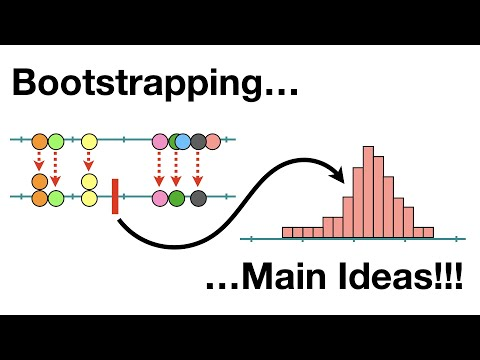

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

Standard Deviation: The standard deviation is a measure of the variability or spread of a set of data points in a sample or population.

Standard Error of the Mean(SEM): The standard error of the mean is a measure of the accuracy or precision of the sample mean as an estimate of the population mean.

Conceptual Difference: SD measures the variability within a dataset, while SEM measures the variability of the sample mean as an estimate of the population mean.

Dependence on Sample Size: SD is independent of sample size, while SEM decreases as the sample size increases. This is because a larger sample provides a more accurate estimate of the population mean.

Use Cases: SD is used to understand the spread of individual data points, whereas SEM is used to understand the reliability of the sample mean.

the standard deviation provides insight into the spread of the data, while the standard error of the mean gives information about the precision of the sample mean as an estimate of the true population mean.

In [3]:
"""Question 4"""

'Question 4'

In [4]:
import numpy as np

# Sample data - Replace with your own data
sample = [10, 12, 15, 18, 22, 24, 25, 29, 30, 32]

# Number of bootstrap samples
n_bootstrap_samples = 1000

# Set random seed for reproducibility
np.random.seed(42)

# Function to perform bootstrap sampling and calculate the statistic
def bootstrap_confidence_interval(sample, statistic_function, num_samples=1000, confidence_level=0.95):
    # Store the calculated statistics for each bootstrap sample
    bootstrap_statistics = []

    # Generate bootstrap samples and calculate the statistic for each
    for _ in range(num_samples):
        bootstrap_sample = np.random.choice(sample, size=len(sample), replace=True)
        bootstrap_statistics.append(statistic_function(bootstrap_sample))

    # Calculate the confidence interval bounds
    alpha = 1 - confidence_level
    lower_bound = np.percentile(bootstrap_statistics, alpha/2 * 100)
    upper_bound = np.percentile(bootstrap_statistics, (1 - alpha/2) * 100)

    return lower_bound, upper_bound

# Calculate the 95% bootstrap confidence interval for the population mean
mean_ci = bootstrap_confidence_interval(sample, np.mean, num_samples=n_bootstrap_samples)
print(f"95% Bootstrap Confidence Interval for Population Mean: {mean_ci}")

# Example modification to calculate a confidence interval for the median
# Change 'np.mean' to 'np.median' to produce a 95% confidence interval for the median
median_ci = bootstrap_confidence_interval(sample, np.median, num_samples=n_bootstrap_samples)
print(f"95% Bootstrap Confidence Interval for Population Median: {median_ci}")

95% Bootstrap Confidence Interval for Population Mean: (17.1975, 26.002499999999998)
95% Bootstrap Confidence Interval for Population Median: (15.0, 29.0)


Bootstrap is a method to estimate confidence intervals for different population parameters (like the mean or median) by repeatedly resampling the original data.

The code generates random samples, calculates the desired statistic for each, and uses percentiles to determine the range of values (confidence interval).

By changing np.mean to np.median, we can get a confidence interval for the median instead of the mean.

In [5]:
"""Question 6"""

'Question 6'

1. Bootstrapping is a method we use when we want to estimate something about a big group of people or things (the population) but we only have a small group of data (a sample). The idea is to make many new samples from the small sample we already have to learn more about the whole population.

2. The main purpose of bootstrapping is to estimate the sampling distribution of a statistic and provide inferences (like confidence intervals or standard errors) about population parameters, especially when the theoretical distribution is unknown, the sample size is small, or when avoiding strong assumptions about the population. It offers a data-driven approach to measure variability and accuracy without relying on parametric methods.

3. you can use bootstrapping to assess whether or not your hypothesized guess is plausible by constructing a confidence interval for the population mean and then seeing if your hypothesized value falls within that interval.

Construct a bootstrap confidence interval for the population mean based on resampling.

Check if your hypothesized mean lies within the bootstrap confidence interval.

If the hypothesized mean falls within the interval, it is plausible. If not, it suggests that the hypothesis may not be supported by the sample.

link to chatbot session:

https://chatgpt.com/share/66fb3891-e360-800d-8687-2ca7bc2e24a2

In [ ]:
"""Question 2"""

This interval is intended to cover 95% of the possible sample means if you were to repeatedly take samples from the population. In other words, if you generated a large number of bootstrap sample means, 95% of them would fall within this interval. This interval gives you an idea of the range where the true population mean is likely to be, based on your sample data and the variability (SEM) observed.

In [ ]:
"""Question 3"""

To create a 95% bootstrap confidence interval for the population mean using the bootstrapped means, generate many bootstrap samples from the original sample by resampling with replacement, and calculate the mean for each bootstrap sample. Then, use the percentile method: find the 2.5th percentile and the 97.5th percentile of the bootstrap means. The resulting interval gives the range in which the true population mean is likely to lie with 95% confidence, based on the empirical distribution of the bootstrapped means, without relying on the standard error calculation.

In [ ]:
"""Question 5"""

We need to distinguish between the population parameter and the sample statistic when creating confidence intervals because they serve different roles: the population parameter is the true, unknown value we aim to estimate, while the sample statistic is an estimate derived from the sample data. A confidence interval uses the sample statistic to provide a range that likely contains the true population parameter, accounting for the uncertainty inherent in using a sample to make inferences about the entire population.

In [ ]:
"""Question 7"""

A confidence interval overlapping zero means we fail to reject the null hypothesis because it indicates that zero is a plausible value for the true effect, implying that the drug might have no effect on average. In contrast, if the confidence interval does not include zero, it means there is enough evidence to conclude that the true effect is significantly different from zero, leading us to reject the null hypothesis and infer that the drug likely has an effect.

In [ ]:
"""Question 8"""

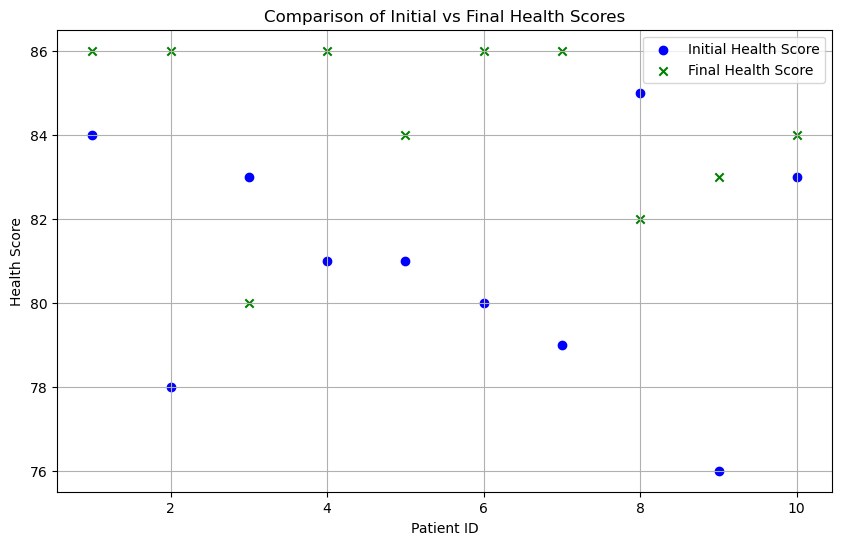

95% Bootstrap Confidence Interval for Mean Difference: (0.70, 5.50)


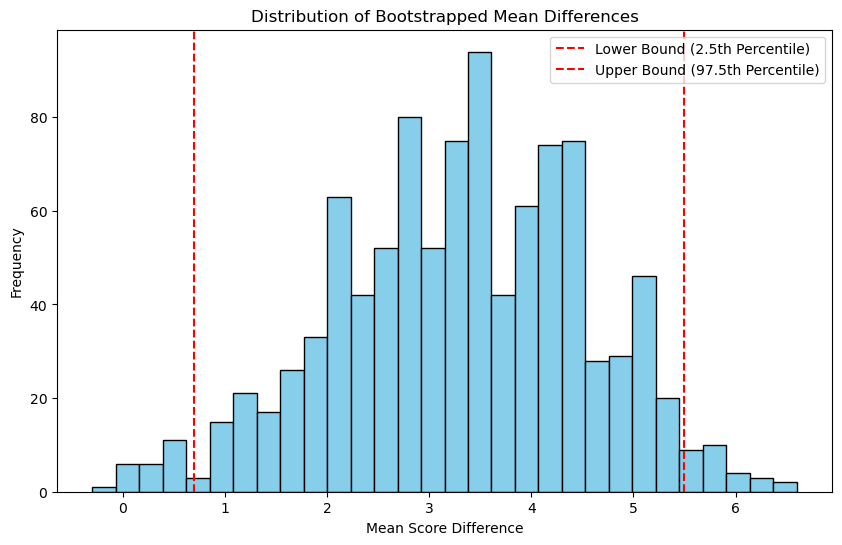

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Write the sample data to a CSV (you would typically have this file already)
csv_data = """PatientID,Age,Gender,InitialHealthScore,FinalHealthScore
1,45,M,84,86
2,34,F,78,86
3,29,M,83,80
4,52,F,81,86
5,37,M,81,84
6,41,F,80,86
7,33,M,79,86
8,48,F,85,82
9,26,M,76,83
10,39,F,83,84
"""

# Save to a CSV file (simulating provided data file)
with open("vaccine_data.csv", "w") as file:
    file.write(csv_data)

# Read in the data
data = pd.read_csv("vaccine_data.csv")

# Visualization of Initial vs Final Health Scores
plt.figure(figsize=(10, 6))
plt.scatter(data['PatientID'], data['InitialHealthScore'], color='blue', label='Initial Health Score', marker='o')
plt.scatter(data['PatientID'], data['FinalHealthScore'], color='green', label='Final Health Score', marker='x')
plt.xlabel('Patient ID')
plt.ylabel('Health Score')
plt.title('Comparison of Initial vs Final Health Scores')
plt.legend()
plt.grid()
plt.show()

# Calculate the difference in health scores
data['ScoreDifference'] = data['FinalHealthScore'] - data['InitialHealthScore']
score_differences = data['ScoreDifference'].values

# Set seed for reproducibility
np.random.seed(42)

# Number of bootstrap samples
n_bootstrap_samples = 1000

# Bootstrapping function
bootstrap_means = []

for _ in range(n_bootstrap_samples):
    bootstrap_sample = np.random.choice(score_differences, size=len(score_differences), replace=True)
    bootstrap_means.append(np.mean(bootstrap_sample))

# Calculate 95% confidence interval
lower_bound = np.percentile(bootstrap_means, 2.5)
upper_bound = np.percentile(bootstrap_means, 97.5)

print(f"95% Bootstrap Confidence Interval for Mean Difference: ({lower_bound:.2f}, {upper_bound:.2f})")

# Visualization of Bootstrapped Means
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_means, bins=30, color='skyblue', edgecolor='black')
plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound (2.5th Percentile)')
plt.axvline(upper_bound, color='red', linestyle='--', label='Upper Bound (97.5th Percentile)')
plt.xlabel('Mean Score Difference')
plt.ylabel('Frequency')
plt.title('Distribution of Bootstrapped Mean Differences')
plt.legend()
plt.show()